# Support Vector machine 


El objetivo del algoritmo de support vector machin es encontrar un hiperplano en un espacio N-dimensional (N, el número de entidades) que clasifique claramente los puntos de datos.
![title](svm1.png)
encontrar el hiperplano optimo en la que la distancia sea maxima 
![title](svm2.png)

### funcion costo
![title](svm3.png)
![title](svm4.png)
![title](svm5.png)

### derivadas parciales con respecto a los pesos
![title](svm6.png)

### para actualizar la gradiente sin errores de clasificacion
$w=w-\alpha*(2\lambda w)$
### actualizar la gradiente con errores de clasificacion
$w=w+\alpha*(y_{i}*x_{i}-2\lambda w)$


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns

In [14]:
df = pd.read_csv('Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

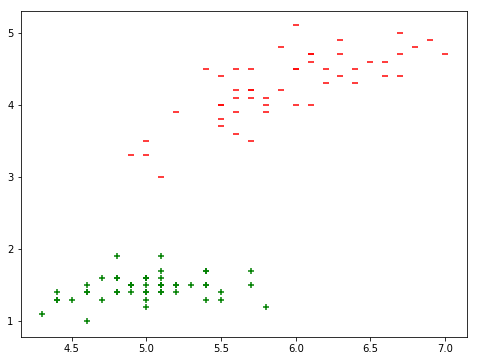

In [15]:
import matplotlib.pyplot as plt
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

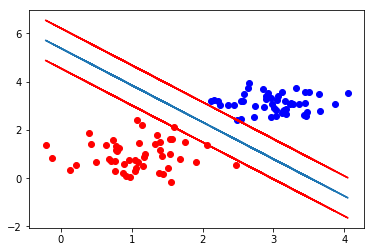

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from io import StringIO

def plot_data(x, y, ax):
    tmp = x[y == 1]
    ax.scatter(tmp[:, 0], tmp[:, 1], c = 'blue')

    tmp = x[y == -1]
    ax.scatter(tmp[:, 0], tmp[:, 1], c = 'red')

# ax + by + c = 0 
# dividiendo la ecuacion entre "b" 
# (a/b)x + y + (c/b) = 0 
# y = (-a/b)x + (-c/b) 
def plot_line(w,x, c, ax):          
    c = c[0]
    pendiente = -w[0]/w[1]          #W[0] = a , W[1] b , b = c
    interseccion = -c/w[1]
    ax.plot(x, x*pendiente + interseccion)
    ax.plot(x, x*pendiente + interseccion+(1/w[1]),'r-')
    ax.plot(x, x*pendiente + interseccion-(1/w[1]),'r-')

def lagrange(x, y): 
    NUM = x.shape[0]
    COL = x.shape[1]
    K = y[:,None] * x
    # print "K ",K
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    return alphas

pfile=open('data2.csv','r')
data=pfile.read()
pfile.close()
data=np.genfromtxt(StringIO(data)) 
data=np.matrix(data)
xx = data[:,0:data.shape[1]-1]
tam = xx.shape[0]
var_x = np.array(xx)
Y = data[:,data.shape[1]-1]
yy = np.squeeze(np.asarray(Y))
var_y = np.array(yy)

alphas = lagrange(var_x,var_y)
var_yy = np.reshape(var_y,(tam,1))
w = np.sum(alphas * var_yy * var_x, axis = 0)
condicion = np.squeeze(alphas>0.0001)

c = var_y[condicion] - np.dot(var_x[condicion], w)

fig, ax = plt.subplots()
plot_data(var_x, var_y, ax)
plot_line(w ,var_x[:,:1], c ,ax )
plt.show()